In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

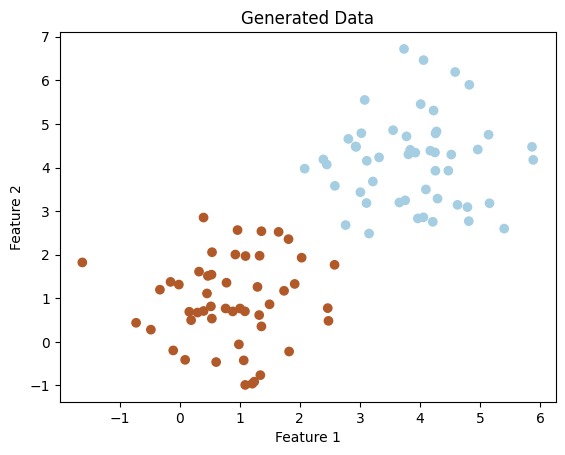

In [2]:
# Generate some random data for two classes
np.random.seed(42)
class_1 = np.random.normal(loc=[1, 1], scale=1, size=(50, 2))
class_2 = np.random.normal(loc=[4, 4], scale=1, size=(50, 2))

# Combine the data and create labels
X = np.vstack([class_1, class_2])
y = np.hstack([np.ones(50), -np.ones(50)])

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o')
plt.title('Generated Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [3]:
X

array([[ 1.49671415,  0.8617357 ],
       [ 1.64768854,  2.52302986],
       [ 0.76584663,  0.76586304],
       [ 2.57921282,  1.76743473],
       [ 0.53052561,  1.54256004],
       [ 0.53658231,  0.53427025],
       [ 1.24196227, -0.91328024],
       [-0.72491783,  0.43771247],
       [-0.01283112,  1.31424733],
       [ 0.09197592, -0.4123037 ],
       [ 2.46564877,  0.7742237 ],
       [ 1.0675282 , -0.42474819],
       [ 0.45561728,  1.11092259],
       [-0.15099358,  1.37569802],
       [ 0.39936131,  0.70830625],
       [ 0.39829339,  2.85227818],
       [ 0.98650278, -0.05771093],
       [ 1.82254491, -0.22084365],
       [ 1.2088636 , -0.95967012],
       [-0.32818605,  1.19686124],
       [ 1.73846658,  1.17136828],
       [ 0.88435172,  0.6988963 ],
       [-0.47852199,  0.28015579],
       [ 0.53936123,  2.05712223],
       [ 1.34361829, -0.76304016],
       [ 1.32408397,  0.61491772],
       [ 0.323078  ,  1.61167629],
       [ 2.03099952,  1.93128012],
       [ 0.16078248,

In [29]:
# SVM parameters
learning_rate = 0.01
epochs = 1000

# Initialize weights and bias
w = np.zeros(X.shape[1])
b = 0

# SVM training using gradient descent
for epoch in range(epochs):
    # Compute the margin for each sample
    margin = y * (np.dot(X, w) + b)
    
    # Indices of misclassified samples
    misclassified = np.where(margin < 1)[0]
    
    # Update weights and bias
    w += learning_rate * (np.dot(X[misclassified].T, y[misclassified]) - 2 * 0.01 * w)
    b += learning_rate * np.sum(y[misclassified])

In [37]:
print("W0:", w[0])
print("W1:", w[1])
print("Bias:", b)

W0: -1.5368776400526898
W1: -1.8208461764472181
Bias: 8.139999999999972


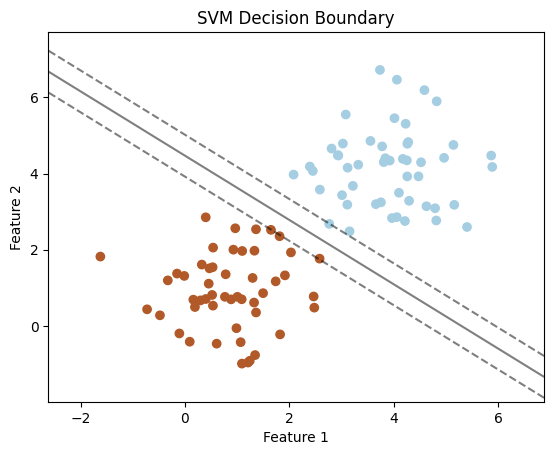

In [32]:
# Plot the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o')
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.title('SVM Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()